In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("science")
from scipy import stats
import seaborn as sns

## Gaussians

In [3]:
n = 1000
x = 2 * np.random.randn(n) + 1
y = 3 * np.random.randn(n) + 30
alpha = stats.norm(1, 2)
beta = stats.norm(30, 3)

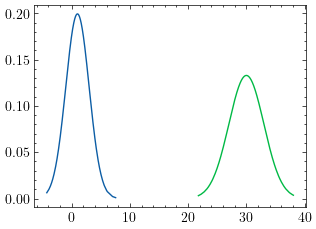

In [4]:
x.sort()
y.sort()
plt.plot(x, alpha.pdf(x))
plt.plot(y, beta.pdf(y))
plt.show()

## Wasserstein Geodesic

$$F_t(x,y) = (1-t)x + t y$$

with distributions

$$P_{t} = T_{t\#} J , P_0 = \alpha \text{ and } P_1 = \beta$$

where $J$ is the optimal coupling

In [5]:
def geodesic(t):
    return np.array([(1-t)*_x + t * _y for (_x, _y) in zip(x,y)])

In [6]:
z1 = geodesic(0.2)
z2 = geodesic(0.5)
z3 = geodesic(0.8)

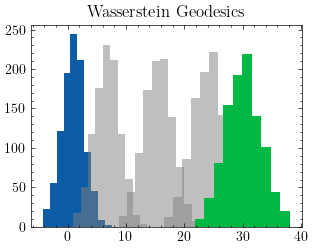

In [7]:
plt.hist(x)
plt.hist(z1, color = "grey", alpha = 0.5)
plt.hist(z2, color = "grey", alpha = 0.5)
plt.hist(z3, color = "grey", alpha = 0.5)
plt.hist(y)
plt.title("Wasserstein Geodesics")
plt.show()

In [8]:
z1_density = stats.gaussian_kde(z1)
z2_density = stats.gaussian_kde(z2)
z3_density = stats.gaussian_kde(z3)

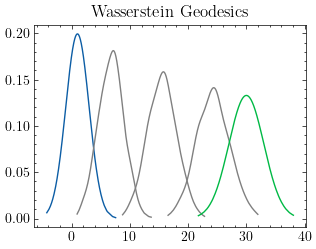

In [9]:
plt.plot(x, alpha.pdf(x))
plt.plot(z1, z1_density.pdf(z1), color = "grey")
plt.plot(z2, z2_density.pdf(z2), color = "grey")
plt.plot(z3, z3_density.pdf(z3), color = "grey")
plt.plot(y, beta.pdf(y))
plt.title("Wasserstein Geodesics")
plt.show()

## Wassestein barycenter

Distribution $P$ that realizes $\min \sum_{j=1}^{n} W_p(P, P_j)$

In [30]:
m = 2
z = np.zeros(n)
x.sort()
y.sort()
for i in range(n):
    z[i] = .5 * (x[i] + y[i])

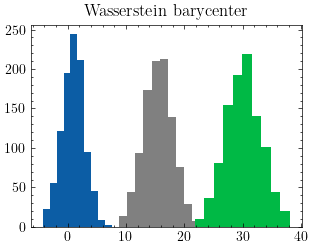

In [31]:
plt.hist(x)
plt.hist(z, color = "grey")
plt.hist(y)
plt.title("Wasserstein barycenter")
plt.show()

Text(0.5, 1.0, 'Wasserstein barycenter')

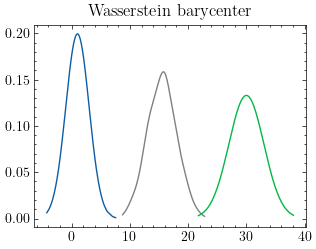

In [32]:
plt.plot(x, alpha.pdf(x))
plt.plot(z, stats.gaussian_kde(z).pdf(z), color = "grey")
plt.plot(y, beta.pdf(y))
plt.title("Wasserstein barycenter")

## Morphing images

In [73]:
from sklearn.datasets import load_digits

In [74]:
data = load_digits()["data"]
target = load_digits()["target"]
m = 8

**Morphing an image into another**

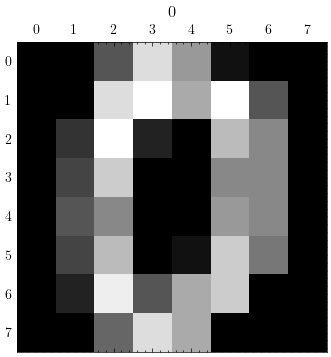

In [75]:
plt.matshow(data[0].reshape(m,m), cmap = plt.cm.gray)
plt.title(target[0])
plt.show()

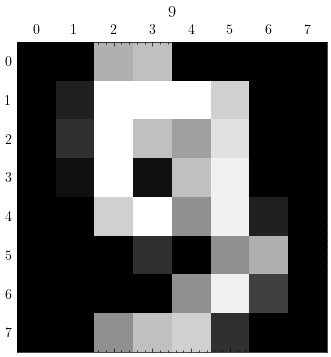

In [76]:
plt.matshow(data[9].reshape(m,m), cmap = plt.cm.gray)
plt.title(target[9])
plt.show()

In [77]:
x = data[0]
y = data[9]

In [78]:
z1 = geodesic(0.2)
z2 = geodesic(0.5)
z3 = geodesic(0.8)

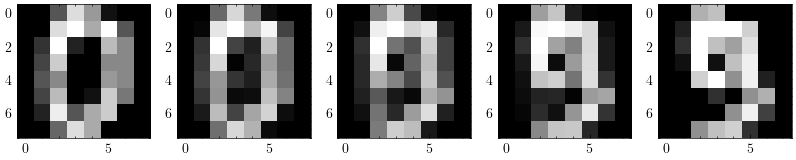

In [79]:
fig, axes = plt.subplots(1, 5, figsize= (10, 10))
axes[0].imshow(x.reshape(m,m), cmap = plt.cm.gray)
axes[1].imshow(z1.reshape(m,m), cmap = plt.cm.gray)
axes[2].imshow(z2.reshape(m,m), cmap = plt.cm.gray)
axes[3].imshow(z3.reshape(m,m), cmap = plt.cm.gray)
axes[4].imshow(y.reshape(m,m), cmap = plt.cm.gray)
plt.show()

### Wasserstein barycenter of a dataset

Let $X_1, X_2, ..X_m$ be m datasets of size $n$,
The wasserstein barycenter is 
$$Y_{(r)} = \frac{1}{m} \sum_{j=1}^{m}X_{(jr)}$$

where $X_{(j1)} \leq X_{(j2)} \leq \ldots \leq X_{(jn)}$ is the order statistics

In [80]:
m = data.shape[0]
n = data.shape[1]

In [82]:
# Barycenter
z = np.zeros(n)
for i in range(n):
    for j in range(m):
        z[i] += data[j][i]
    z[i] /= m

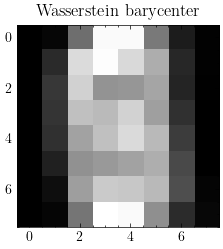

In [85]:
plt.imshow(z.reshape(8, 8), cmap = plt.cm.gray)
plt.title("Wasserstein barycenter")
plt.show()